In [1]:
import numpy as np
from scipy import stats
import networkx as nx
from networkx.algorithms import tree

In [2]:
from algorithm.louvain import louvain
from algorithm.spectral_clustering import spectral_clustering, normalized_spectral_clustering
from algorithm.hierarchical_clustering import mst_cut_clustering
from utils.analyze import get_rs_from_fixed_weighted_degree, compute_clustering, validation, metrics_to_df 

## [Experiment 6: fixed average weighted degree=16 for graph of 40 vertices and 2 clusters. variating p_out from 0 to p_out_max.](#exp6)

In [3]:
rs = get_rs_from_fixed_weighted_degree(degree=16, cluster_size= 20, num_clusters=2,r_out_bound = (0,1,100))

Generating graphs started


100%|██████████| 41/41 [03:23<00:00,  4.97s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 41/41 [00:34<00:00,  1.20it/s]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 41/41 [00:34<00:00,  1.19it/s]


normalized_spectral_clustering complete
louvain started


100%|██████████| 41/41 [00:55<00:00,  1.35s/it]


louvain complete
mst_cut_clustering started


100%|██████████| 41/41 [00:26<00:00,  1.55it/s]


mst_cut_clustering complete


100%|██████████| 4/4 [00:56<00:00, 14.22s/it]


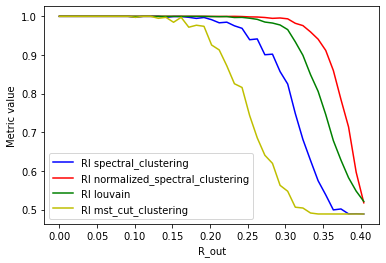

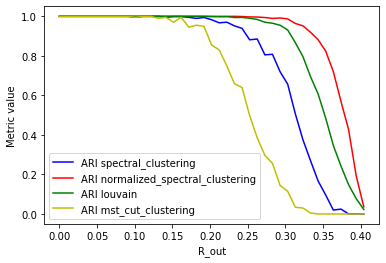

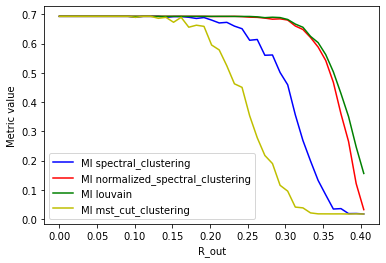

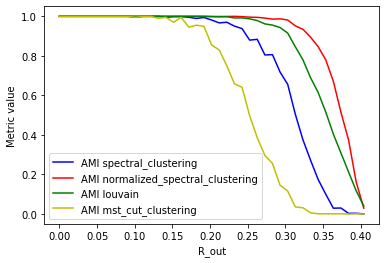

In [5]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=200)

metrics40 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df40 = metrics_to_df(metrics40, rs)
df40.to_csv('graph_40_degree16_sample_40_repeates400')

Generating graphs started


100%|██████████| 41/41 [02:48<00:00,  4.11s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 41/41 [00:31<00:00,  1.31it/s]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 41/41 [00:34<00:00,  1.17it/s]


normalized_spectral_clustering complete
louvain started


100%|██████████| 41/41 [00:39<00:00,  1.03it/s]


louvain complete
mst_cut_clustering started


100%|██████████| 41/41 [00:19<00:00,  2.11it/s]


mst_cut_clustering complete


100%|██████████| 4/4 [00:43<00:00, 10.94s/it]


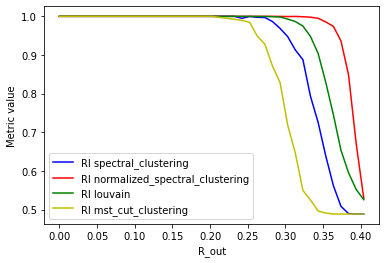

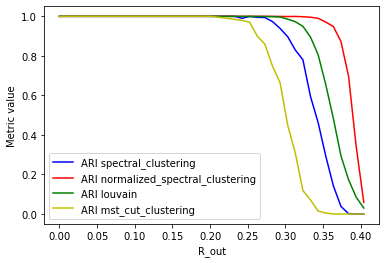

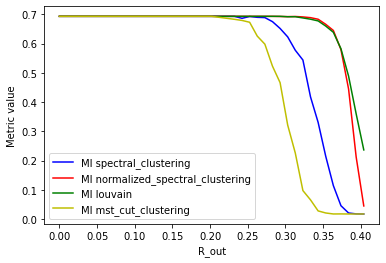

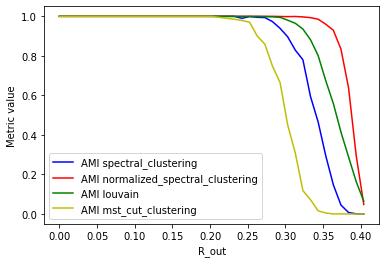

In [25]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 80,
    num_repeats=200)

metrics80 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df80 = metrics_to_df(metrics80, rs)
df80.to_csv('graph_40_degree16_sample_80_repeates400')

Generating graphs started


100%|██████████| 41/41 [02:20<00:00,  3.42s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 41/41 [00:30<00:00,  1.32it/s]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 41/41 [00:31<00:00,  1.29it/s]


normalized_spectral_clustering complete
louvain started


100%|██████████| 41/41 [00:39<00:00,  1.04it/s]


louvain complete
mst_cut_clustering started


100%|██████████| 41/41 [00:20<00:00,  2.02it/s]


mst_cut_clustering complete


100%|██████████| 4/4 [00:51<00:00, 12.91s/it]


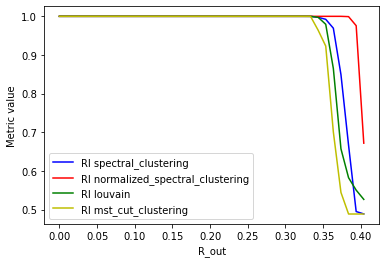

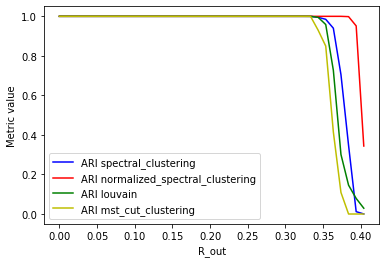

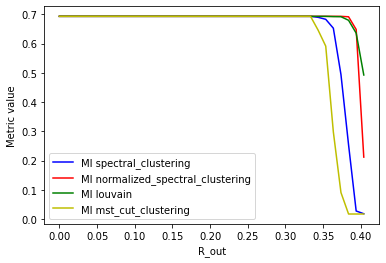

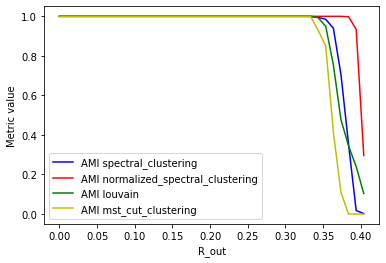

In [26]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 400,
    num_repeats=200)

metrics400 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df400 = metrics_to_df(metrics400, rs)
df400.to_csv('graph_degree16_sample_400_repeates400')

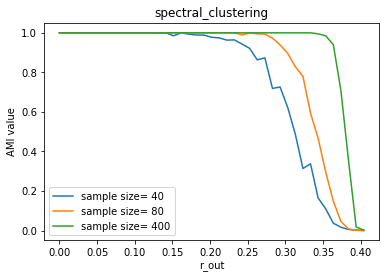

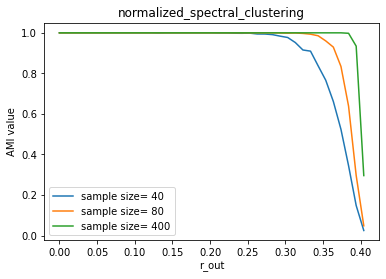

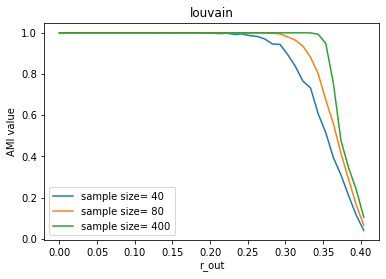

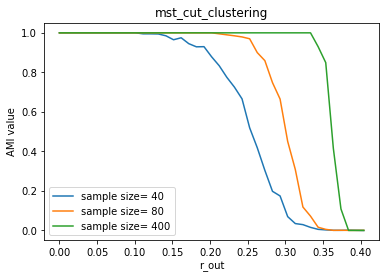

In [27]:
list(metrics40.keys())
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], metrics40[algo][metric], metrics80[algo][metric], metrics400[algo][metric])), columns = ['r_out', 'sample size= 40', 'sample size= 80', 'sample size= 400']).set_index(['r_out'])
    df.plot(title=algo, ylabel = metric + ' value')

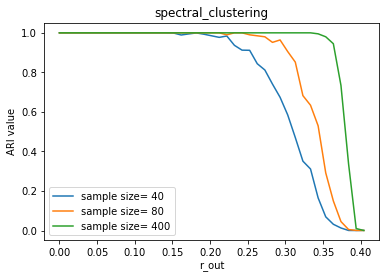

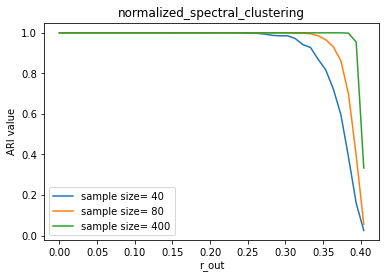

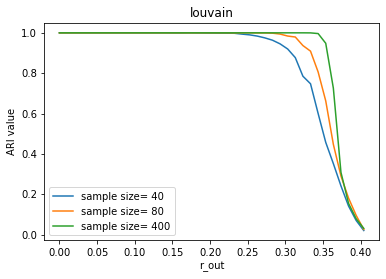

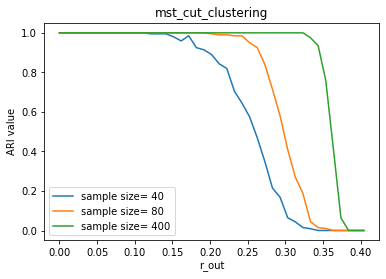

In [135]:
list(metrics40.keys())

for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], metrics40[algo]['ARI'], metrics80[algo]['ARI'], metrics400[algo]['ARI'])), columns = ['r_out', 'sample size= 40', 'sample size= 80', 'sample size= 400']).set_index(['r_out'])
    df.plot(title=algo, ylabel = 'ARI value')

## Experiment 7. Consider graphs of different size: 20,40,80,120 with equal sample volume. In this experiment average weighted degree is fixed, the value is 16.

In [19]:
rs = get_rs_from_fixed_weighted_degree(degree=16, cluster_size= 20, num_clusters=2,r_out_bound = (0,1,100))

In [ ]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=10,
    sample_vol = 20,
    num_repeats=200)

metrics20 = validation(true_labels, result, estimated_graphs_bags, by_rin = False) 

true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=200)

metrics40 = validation(true_labels, result, estimated_graphs_bags, by_rin = False) 

true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=40,
    sample_vol = 80,
    num_repeats=200)

metrics80 = validation(true_labels, result, estimated_graphs_bags, by_rin = False)

true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=60,
    sample_vol = 120,
    num_repeats=200)

metrics120 = validation(true_labels, result, estimated_graphs_bags, by_rin = False)

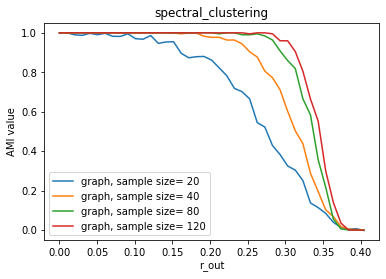

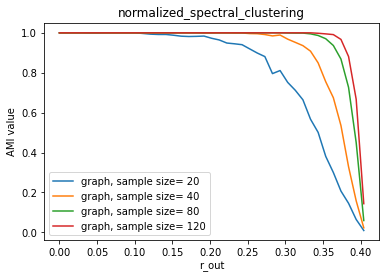

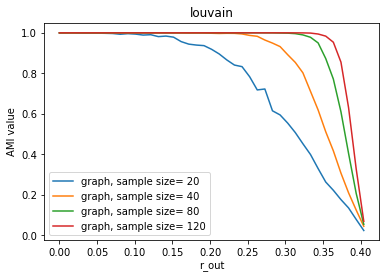

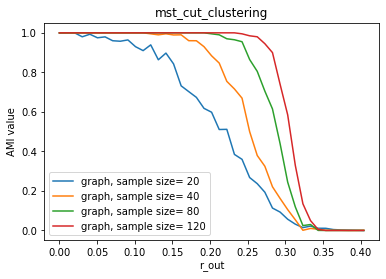

In [21]:
list(metrics40.keys())
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], metrics20[algo][metric], metrics40[algo][metric], metrics80[algo][metric], metrics120[algo][metric])), columns = ['r_out', 'graph, sample size= 20', 'graph, sample size= 40', 'graph, sample size= 80', 'graph, sample size= 120']).set_index(['r_out'])
    df.plot(title=algo, ylabel = metric + ' value')

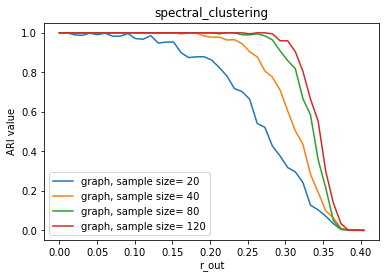

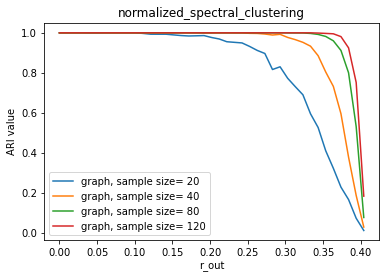

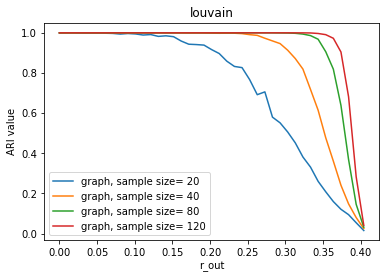

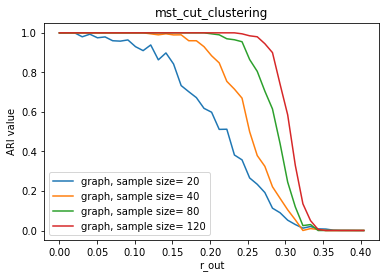

In [22]:
list(metrics40.keys())
metric = 'ARI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], metrics20[algo][metric], metrics40[algo][metric], metrics80[algo][metric], metrics120[algo][metric])), columns = ['r_out', 'graph, sample size= 20', 'graph, sample size= 40', 'graph, sample size= 80', 'graph, sample size= 120']).set_index(['r_out'])
    df.plot(title=algo, ylabel = metric + ' value')

## Stocks clustering

In [51]:
dow30_tickers = ['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 
                'CSCO', 'CVX', 'GS', 'HD', 'HON',
                'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
                'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
                'PG', 'TRV', 'UNH', 'CRM', 'VZ',
                'V', 'WBA', 'WMT', 'DIS', 'DOW'
                ]
len(dow30_tickers)

30

In [52]:
import yfinance as yf

START_DATE  ="2021-01-01"
END_DATE ="2022-01-01"
data = yf.download(' '.join(dow30_tickers), start=START_DATE, end=END_DATE,
                                 group_by='ticker')

[*********************100%***********************]  30 of 30 completed


In [53]:
data = data[[(ticker, 'Close') for ticker in dow30_tickers]].copy()
data = data.rename(columns = {name:name[0] for name in data.columns})
data.columns = dow30_tickers
#data = data.rename(columns = {name:name[0] for name in data.columns})
data.head()

,AXP,AMGN,AAPL,BA,CAT,CSCO,CVX,GS,HD,HON,...,PG,TRV,UNH,CRM,VZ,V,WBA,WMT,DIS,DOW
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,120.910004,229.919998,132.690002,214.059998,182.020004,44.750000,84.449997,263.709991,265.619995,212.699997,...,139.139999,140.369995,350.679993,222.529999,58.750000,218.729996,39.880001,144.149994,181.179993,55.500000
2021-01-04,118.040001,226.660004,129.410004,202.720001,182.149994,43.959999,84.709999,265.000000,263.920013,207.949997,...,137.820007,135.649994,349.500000,220.309998,58.849998,217.759995,41.400002,146.529999,177.679993,54.040001
2021-01-05,118.669998,227.759995,131.009995,211.630005,183.639999,43.980000,87.000000,270.929993,266.049988,208.460007,...,138.699997,134.529999,344.799988,221.520004,58.580002,214.509995,41.160000,145.750000,178.440002,55.799999
2021-01-06,123.059998,233.250000,126.599998,211.029999,193.860001,44.400002,89.800003,285.549988,267.570007,212.259995,...,140.160004,139.100006,359.269989,216.149994,59.290001,212.619995,43.029999,146.660004,179.119995,58.430000
2021-01-07,121.660004,234.020004,130.919998,212.710007,194.229996,44.959999,90.220001,291.649994,266.260010,212.610001,...,138.850006,139.070007,365.029999,217.979996,58.529999,213.809998,45.259998,146.649994,178.580002,58.509998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,164.389999,225.169998,180.330002,203.169998,206.380005,63.419998,118.790001,388.040009,404.089996,206.429993,...,161.970001,156.039993,499.500000,258.299988,52.680000,217.630005,50.730000,140.759995,152.800003,55.869999
2021-12-28,164.410004,225.770004,179.289993,206.130005,206.619995,63.529999,118.559998,387.609985,406.220001,207.050003,...,162.839996,157.119995,502.940002,255.449997,52.720001,218.050003,51.430000,142.779999,155.199997,56.630001
2021-12-29,163.830002,227.600006,179.380005,203.660004,207.330002,63.959999,117.949997,386.200012,410.839996,207.529999,...,164.190002,157.500000,505.579987,254.539993,52.360001,218.169998,52.250000,142.710007,154.869995,57.060001


In [55]:
data = data.apply(lambda x: np.log(x/x.shift(1)))
data = data.dropna()
data

,AXP,AMGN,AAPL,BA,CAT,CSCO,CVX,GS,HD,HON,...,PG,TRV,UNH,CRM,VZ,V,WBA,WMT,DIS,DOW
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,-0.024023,-0.014280,-0.025030,-0.054431,0.000714,-0.017811,0.003074,0.004880,-0.006421,-0.022585,...,-0.009532,-0.034204,-0.003371,-0.010026,0.001701,-0.004445,0.037406,0.016376,-0.019507,-0.026658
2021-01-05,0.005323,0.004841,0.012288,0.043014,0.008147,0.000455,0.026674,0.022131,0.008038,0.002450,...,0.006365,-0.008291,-0.013539,0.005477,-0.004598,-0.015037,-0.005814,-0.005337,0.004268,0.032049
2021-01-06,0.036326,0.023818,-0.034241,-0.002839,0.054159,0.009505,0.031677,0.052557,0.005697,0.018065,...,0.010471,0.033406,0.041110,-0.024540,0.012047,-0.008850,0.044431,0.006224,0.003804,0.046056
2021-01-07,-0.011442,0.003296,0.033554,0.007929,0.001907,0.012534,0.004666,0.021137,-0.004908,0.001648,...,-0.009390,-0.000216,0.015905,0.008431,-0.012901,0.005581,0.050526,-0.000068,-0.003019,0.001368
2021-01-08,0.000986,0.018921,0.008594,-0.013299,0.000154,0.002222,0.009487,-0.005398,0.010573,-0.012209,...,-0.000432,0.004162,-0.004503,0.018454,-0.012551,0.007641,-0.001105,-0.000136,0.000616,-0.005141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.001217,0.006148,0.022715,-0.005155,0.000873,0.018139,0.020239,0.007761,0.017525,0.005879,...,0.011612,0.008948,0.008282,0.020179,0.000000,0.004652,0.004940,0.009063,-0.005417,0.013152
2021-12-28,0.000122,0.002661,-0.005784,0.014464,0.001162,0.001733,-0.001938,-0.001109,0.005257,0.002999,...,0.005357,0.006897,0.006863,-0.011095,0.000759,0.001928,0.013704,0.014249,0.015585,0.013511
2021-12-29,-0.003534,0.008073,0.000502,-0.012055,0.003430,0.006746,-0.005158,-0.003644,0.011309,0.002316,...,0.008256,0.002416,0.005235,-0.003569,-0.006852,0.000550,0.015818,-0.000490,-0.002129,0.007564


In [64]:
cov = np.cov(data.T)
cov = set_zero_weights_to_very_low(cov)

In [66]:
def check(col1, col2):
    # вычислить коэффициент преобразования
    # при этом надо найти ненулевые значения иначе
    first1 = -1
    first2 = -1

    for i in range(len(col1)):
        if col1[i] != 0 and first1 != -1:
            first1 = i

        if col2[i] != 0 and first2 != -1:
            first2 = i

    # если ненулевых элементов не найдено - выйти
    if first1 == 0 and first2 == 0:
        return True

    # найти коэффициент
    first = max(first1, first2)
    coeff = col1[first] / col2[first]

    # проверить элементы столбцов - можно ли их представить в виде elem2 = elem1 * const
    for i in range(len(col1)):
        if abs(col1[i] - col2[i] * coeff) > 1e-10:
            return False

    return True

# проверить, является ли матрица вырожденной
def is_invertible(matrix):
    n = len(matrix)
    for i in range(n - 1):
        for j in range(i + 1, n):
            if check(matrix[i], matrix[j]):
                return True
    return False

is_invertible(cov)

False

In [68]:
cor = get_cor_from_cov(cov)
k=2
algos = [spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ]
result = dict()
for algo in algos:
    result[algo.__name__] = algo(cor,k)
pd.DataFrame(result)

,spectral_clustering,normalized_spectral_clustering,louvain,mst_cut_clustering
0,0,1,2,0
1,0,0,3,0
2,0,0,0,0
3,0,1,2,0
4,0,1,2,0
5,0,0,0,0
6,0,1,2,0
7,0,1,2,0
8,0,0,0,0
9,0,1,1,0


In [88]:
sample_vol = 250
distribution = np.random.multivariate_normal
mean = np.mean(data)
samples = distribution(mean, cov, sample_vol).T
esimated_cor = np.corrcoef(samples)

(30, 250)

In [95]:
k=2
algos = [spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ]
result_e = dict()
for algo in algos:
    result_e[algo.__name__] = algo(esimated_cor,k)
pd.DataFrame(result)

,spectral_clustering,normalized_spectral_clustering,louvain,mst_cut_clustering
0,0,1,2,0
1,0,0,3,0
2,0,0,0,0
3,0,1,2,0
4,0,1,2,0
5,0,0,0,0
6,0,1,2,0
7,0,1,2,0
8,0,0,0,0
9,0,1,1,0


In [201]:
def stock_uncertainty(cor, num_repeats, num_clusters, algos):
    
    result = dict()    
    sample_vol = 250

    distribution = np.random.multivariate_normal

    mean = np.mean(data)
    samples = np.hsplit(distribution(mean, cov, sample_vol * num_repeats).T, num_repeats)
    samples_bag = generate_samples_bag(mean, cov, bags = num_repeats, sample_size=sample_vol)
    estimated_graphs_bag = [set_zero_weights_to_very_low(np.corrcoef(sample)) for sample in samples_bag]
    true_labels = dict()
    for algo in algos:
        true_labels[algo.__name__] = algo(cor, num_clusters)
        algo_result = []
        for estimated_graph in estimated_graphs_bag:
            algo_result.append(algo(estimated_graph, num_clusters))       
        result[algo.__name__] = algo_result
    
    metrics_by_algos = dict()
    for algo in result:
        metrics = dict()
        metrics['RI'] = np.array([rand_score(true_labels[algo], labels) for labels in result[algo]]).T
        metrics['ARI'] = np.array([adjusted_rand_score(true_labels[algo], labels) for labels in result[algo]]).T
        metrics_by_algos[algo] = metrics    
    return true_labels, result, estimated_graphs_bag, metrics_by_algos


def stock_uncertainty_different_k(cor, num_repeats, ks, algos):
    metrics = dict()
    for k in ks:
        true_labels, result, estimated_graphs_bag, metrics[k] = stock_uncertainty(cor, num_repeats, k, algos)
    for k in metrics:
        for algo in metrics[k]:
            for metric_type in metrics[k][algo]:
                metrics[k][algo][metric_type] = np.mean(metrics[k][algo][metric_type])
    
    metric_by_k = dict()
    for k in metrics:
        for algo in metrics[k]:
            metric_by_k[algo] = dict()
            for metric_type in metrics[k][algo]:
                metric_by_k[algo][metric_type] = []
    for k in metrics:
        for algo in metrics[k]:
            for metric_type in metrics[k][algo]:
                metric_by_k[algo][metric_type].append(metrics[k][algo][metric_type])
    df  = pd.DataFrame(nested_dict_to_dict(metric_by_k), index = None)
    df['k'] = ks
    df.set_index('k', inplace=True)
    return df


In [195]:
algos = [spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ]
true_labels, result, graphs, metrics = stock_uncertainty(cor, 400, 2, algos)

100%|██████████| 4/4 [00:00<00:00,  5.92it/s]


In [196]:
df  = pd.DataFrame(nested_dict_to_dict(metrics), index = None)
df

spectral_clustering           normalized_spectral_clustering            \
                     RI       ARI                             RI       ARI   
0              1.000000  1.000000                       0.813793  0.627407   
1              0.871264 -0.034483                       0.668966  0.339519   
2              1.000000  1.000000                       0.871264  0.742582   
3              1.000000  1.000000                       0.813793  0.627202   
4              1.000000  1.000000                       0.933333  0.866603   
..                  ...       ...                            ...       ...   
395            1.000000  1.000000                       0.813793  0.627407   
396            1.000000  1.000000                       0.871264  0.742582   
397            1.000000  1.000000                       0.871264  0.742299   
398            0.871264 -0.034483                       1.000000  1.000000   
399            1.000000  1.000000                       0.871264  0.742299   

      louvain           mst_cut_clustering            
           RI       ARI                 RI       ARI  
0    0.983908  0.946141           1.000000  1.000000  
1    0.864368  0.574597           0.871264 -0.034483  
2    0.926437  0.766121           1.000000  1.000000  
3    0.924138  0.768307           0.871264 -0.034483  
4    0.889655  0.664460           1.000000  1.000000  
..        ...       ...                ...       ...  
395  0.974713  0.915365           0.871264 -0.034483  
396  0.947126  0.842647           0.871264 -0.034483  
397  0.908046  0.727503           1.000000  1.000000  
398  0.931034  0.770279           0.871264 -0.034483  
399  0.885057  0.673247           0.871264 -0.034483  

[400 rows x 8 columns]

In [199]:
metrics_by_k = stock_uncertainty_different_k(cor, 400, [2,3,4,5,6,7], algos)

100%|██████████| 4/4 [00:00<00:00,  5.75it/s]


In [200]:
metrics_by_k

spectral_clustering           normalized_spectral_clustering            \
                   RI       ARI                             RI       ARI   
k                                                                          
2            0.948822  0.706700                       0.793966  0.588575   
3            0.903339  0.702523                       0.866943  0.698180   
4            0.840603  0.637600                       0.764420  0.379552   
5            0.793885  0.580203                       0.810621  0.402393   
6            0.742822  0.491021                       0.845006  0.470530   
7            0.773040  0.535907                       0.867563  0.476195   

    louvain           mst_cut_clustering            
         RI       ARI                 RI       ARI  
k                                                   
2  0.901557  0.716364           0.947644  0.586053  
3  0.909552  0.714407           0.922897  0.674871  
4  0.886443  0.672291           0.886925  0.651238  
5  0.910408  0.718182           0.887069  0.717196  
6  0.903839  0.704055           0.856724  0.680197  
7  0.904149  0.714463           0.817793  0.622928